### **ESG** stands for Environmental, Social, and Governance.

Companies today face pressure to be sustainable - reducing pollution, treating people fairly,
and running ethically while still making money. High ESG scores can attract investors and help
the environment.

In this notebook, we will extract key insights from our data to guide companies in enhancing their ESG scores.

**Dataset Link:** https://www.kaggle.com/datasets/shriyashjagtap/esg-and-financial-performance-dataset

# **Description Of Data:**

**1. CompanyID :** Unique identifier for each synthetic company

**2. CompanyName :** Synthetic name (e.g., "Company_123")

**3. Industry :** Industry sector (e.g., Technology, Finance, Energy)

**4. Region :** Geographic region (e.g., North America, Europe)

**5. Year :** Reporting year (2015–2025)

**6. Revenue :** Annual revenue in millions USD

**7. ProfitMargin :** Net profit margin as percentage of revenue

**8. MarketCap :** Market capitalization in millions USD

**9. GrowthRate :** Year-over-year revenue growth rate (%)

**10. ESG_Overall :** Aggregate ESG sustainability score (0–100)

**11. ESG_Environmental :** Environmental sustainability score (0–100)

**12. ESG_Social :** Social responsibility score (0–100)

**13. ESG_Governance :** Corporate governance quality score (0–100)

**14. CarbonEmissions :** Annual carbon emissions in tons CO₂

**15. WaterUsage :** Annual water usage in cubic meters

**16. EnergyConsumption :** Annual energy consumption in megawatt-hours (MWh)

#### Subdivisions of each feature:

- **Financials →** Revenue, ProfitMargin, MarketCap, GrowthRate

- **ESG Scores →** ESG_Overall, ESG_Environmental, ESG_Social, ESG_Governance

- **Sustainability metrics →** CarbonEmissions, WaterUsage, EnergyConsumption

- **Meta →** CompanyName, Industry, Region, Year

# **Loading data**

In [1]:
import pandas as pd
df=pd.read_csv(r'/content/company_esg_financial_dataset.csv')
df.sample(6)

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
5974,544,Company_544,Energy,Latin America,2016,4931.9,3.4,2627.6,12.3,52.9,82.1,48.1,28.3,3082374.2,924712.2,30823741.6
8541,777,Company_777,Utilities,Middle East,2020,2004.4,11.3,2140.2,5.6,44.5,53.5,51.6,28.3,1323639.7,827274.8,13236397.0
706,65,Company_65,Transportation,Europe,2017,737.9,1.6,172.0,-6.2,64.8,32.7,92.9,68.7,430074.6,71679.1,1433582.0
9478,862,Company_862,Finance,Latin America,2022,4993.3,16.5,12564.8,7.4,63.7,66.7,48.5,75.9,73223.7,36611.8,183059.2
475,44,Company_44,Healthcare,Oceania,2017,8677.4,29.6,51957.2,-6.2,55.0,46.0,29.4,89.8,761898.9,761898.9,1523797.9
7940,722,Company_722,Healthcare,Asia,2024,4318.4,12.9,11641.5,13.2,45.6,81.5,34.6,20.8,271756.5,271756.5,543513.0


# **Data Understanding**

In [3]:
df.shape

(11000, 16)

Dataset have 11000 rows and 16 columns.

In [15]:
# Help in determining data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6056 entries, 1 to 10999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyName        6056 non-null   object 
 1   Industry           6056 non-null   object 
 2   Region             6056 non-null   object 
 3   Year               6056 non-null   int64  
 4   Revenue            6056 non-null   float64
 5   ProfitMargin       6056 non-null   float64
 6   MarketCap          6056 non-null   float64
 7   GrowthRate         6056 non-null   float64
 8   ESG_Overall        6056 non-null   float64
 9   ESG_Environmental  6056 non-null   float64
 10  ESG_Social         6056 non-null   float64
 11  ESG_Governance     6056 non-null   float64
 12  CarbonEmissions    6056 non-null   float64
 13  WaterUsage         6056 non-null   float64
 14  EnergyConsumption  6056 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 757.0+ KB


In [17]:
# Statistics summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6056.0,2.020296e+03,2.860608e+00,2016.0,2018.000,2020.00,2023.000,2025.0
Revenue,6056.0,1.719880e+03,1.531502e+03,35.9,706.400,1190.25,2233.525,9447.8
ProfitMargin,6056.0,9.691034e+00,7.179650e+00,-10.6,4.700,9.60,14.400,31.1
MarketCap,6056.0,3.201870e+03,3.426461e+03,1.8,755.450,1794.20,4519.375,14822.9
GrowthRate,6056.0,4.268197e+00,8.667835e+00,-19.7,-1.600,4.20,10.000,27.7
ESG_Overall,6056.0,5.513293e+01,1.567684e+01,13.2,44.700,55.10,66.000,96.0
ESG_Environmental,6056.0,5.724444e+01,2.592342e+01,0.0,37.000,57.00,78.100,100.0
ESG_Social,6056.0,5.568443e+01,2.320409e+01,0.0,38.000,55.50,73.000,100.0
ESG_Governance,6056.0,5.246899e+01,2.528820e+01,0.0,32.200,53.00,73.625,100.0
CarbonEmissions,6056.0,2.479205e+05,2.280340e+05,2042.2,80316.175,185189.00,337684.300,1395370.3


# **Data Cleaning**

We will drop column ```CompanyID``` as each companies are uniquely identified by ```CompanyName```.

In [7]:
df.drop(columns='CompanyID', axis=1,inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

No duplicate rows exist in our  dataset.

Now, we will check the presence  of outliers in each column of dataset using boxplot.

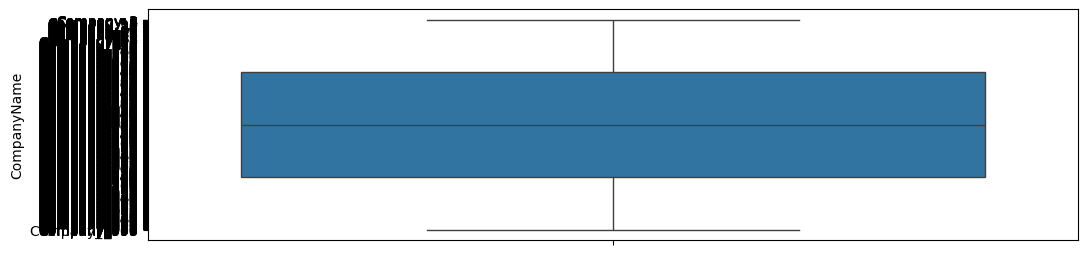

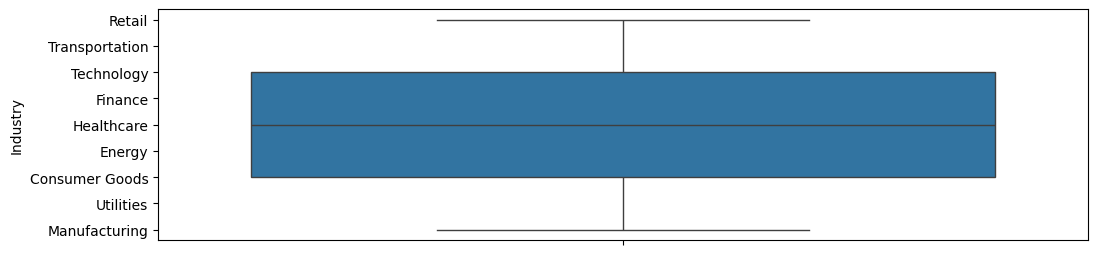

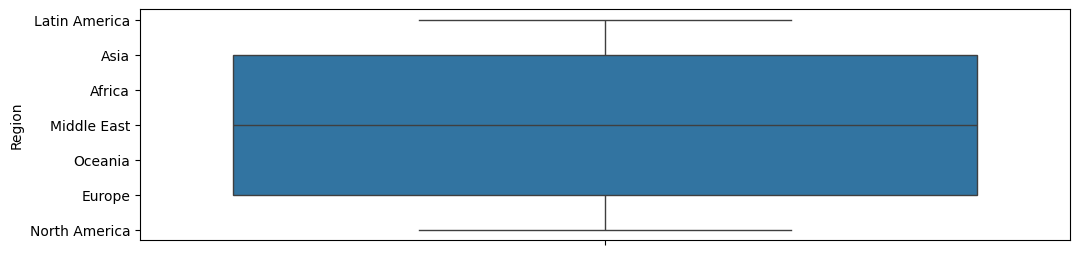

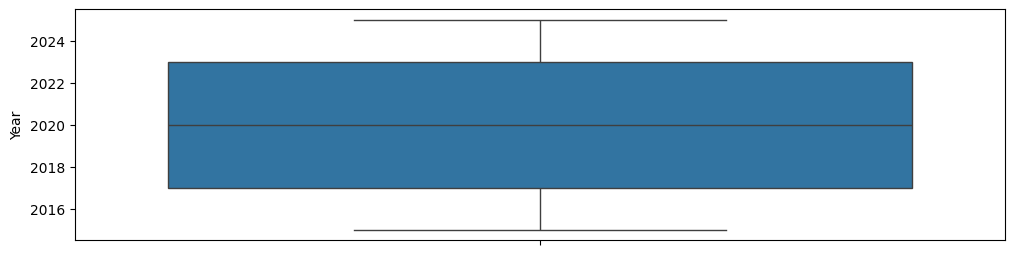

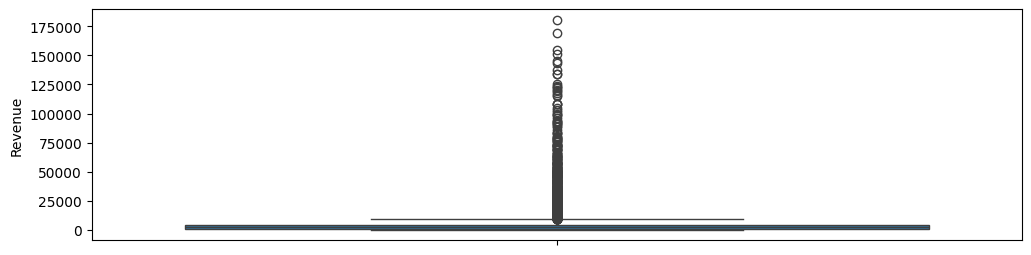

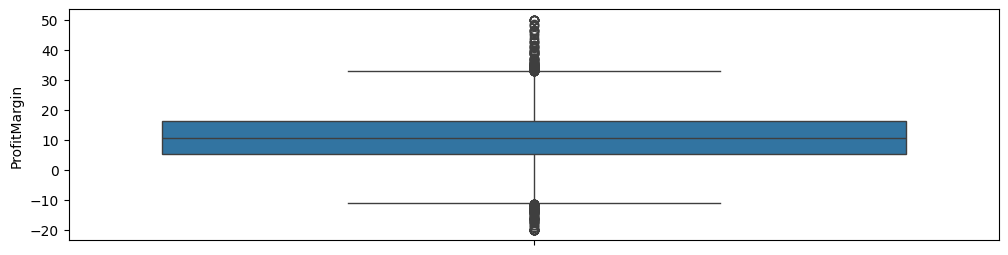

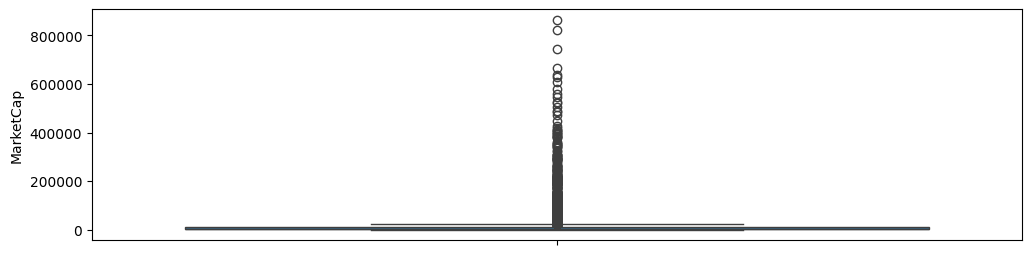

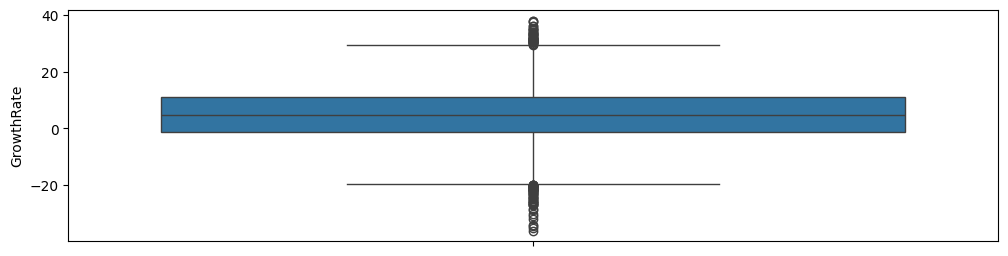

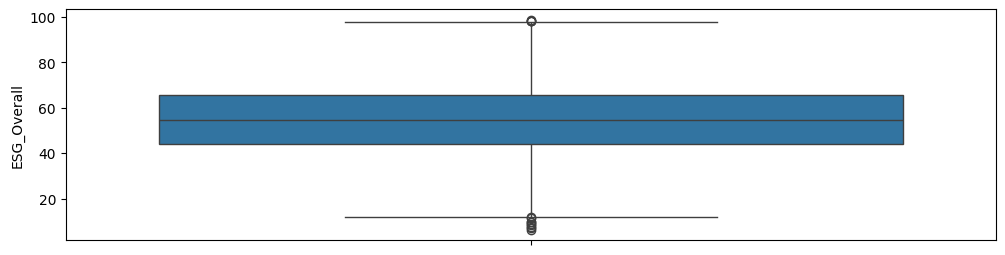

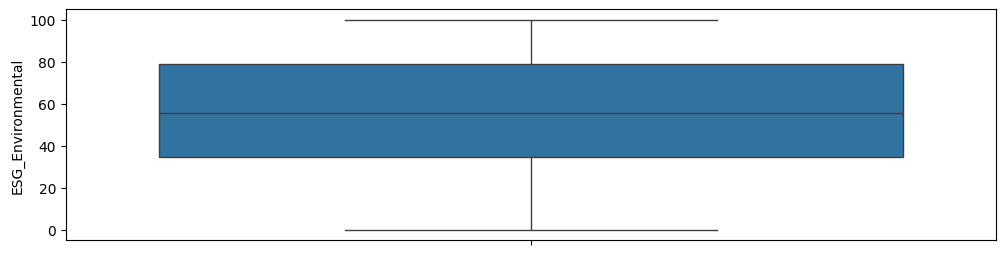

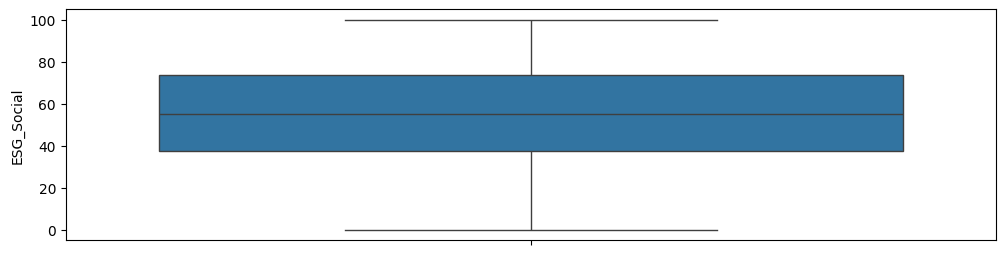

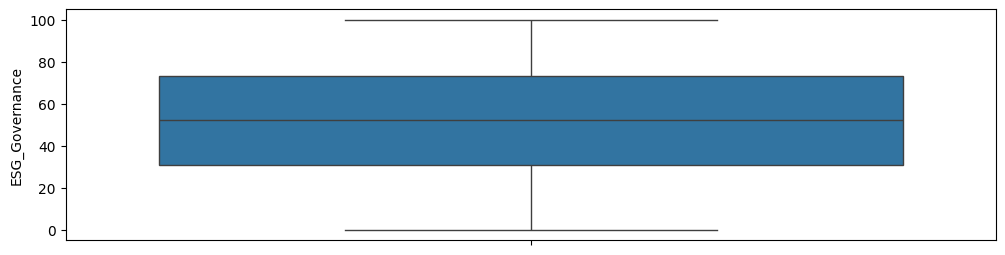

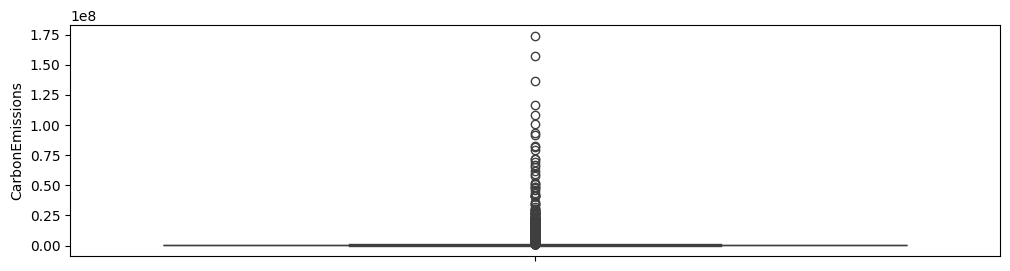

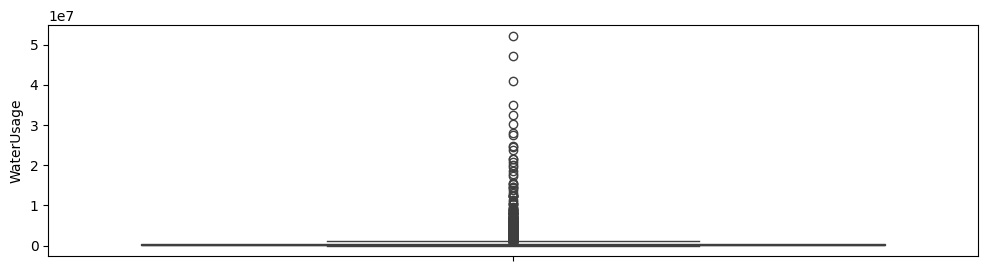

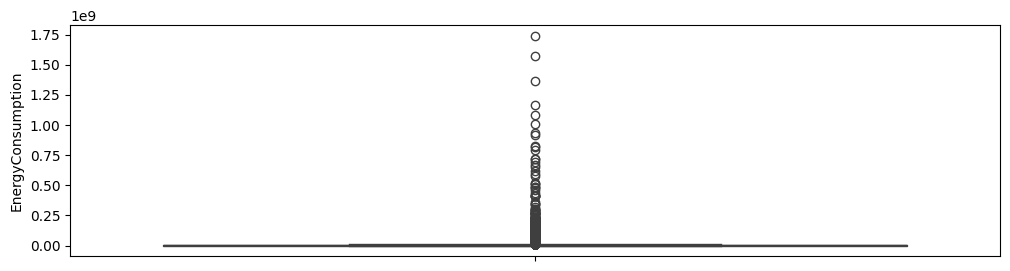

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
  plt.figure(figsize=(12,3))
  sns.boxplot(df[i])

### **Removal of Outliers**

In [12]:
for i in df.columns:
    if df[i].dtype != 'object':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        df = df[(df[i] >= lower) & (df[i] <= upper)]

print(df.shape)


(6056, 15)


This reduces the number of rows from 11000 to 6056 i.e. 44% of rows.

### Boxplot without outliers

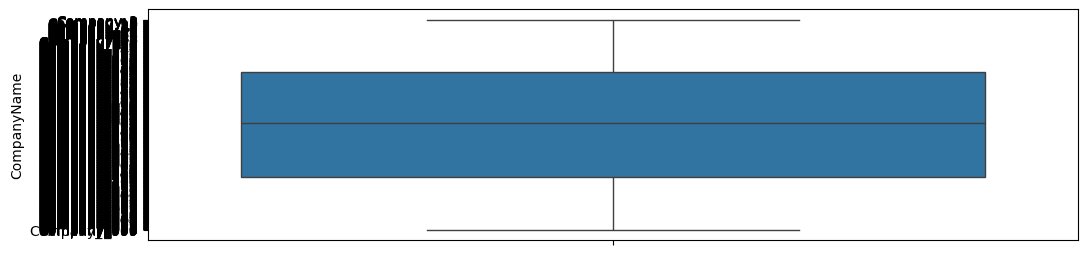

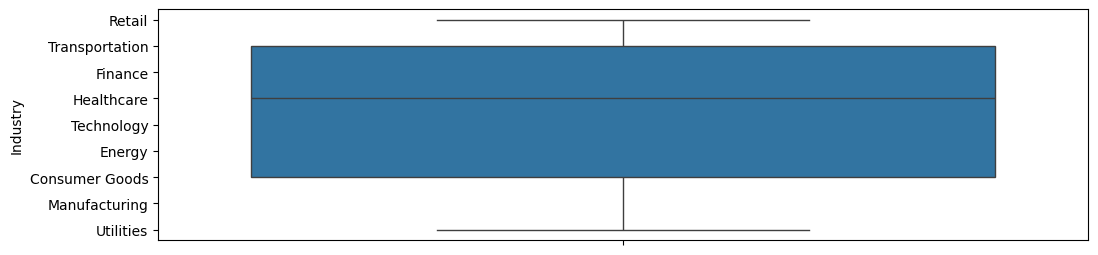

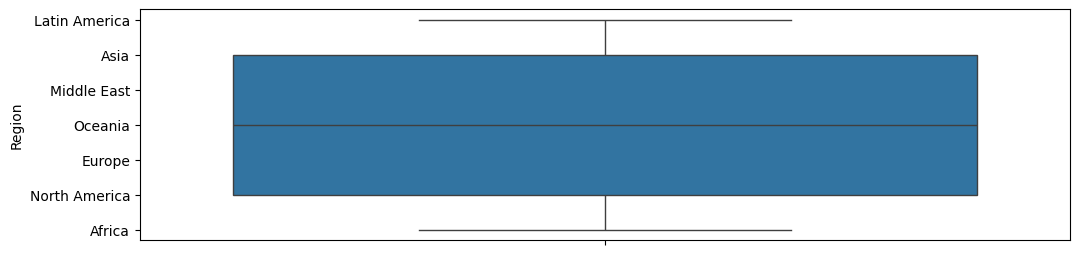

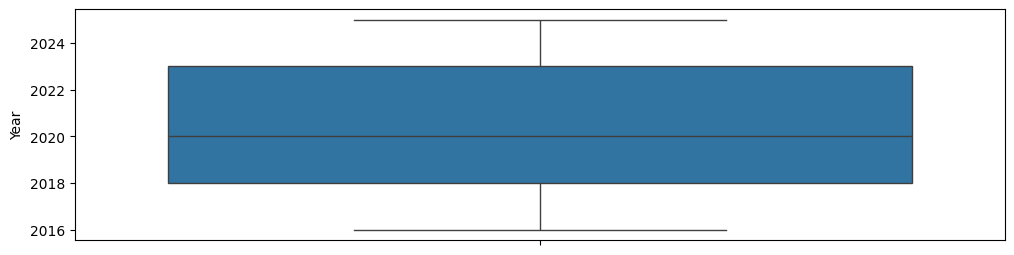

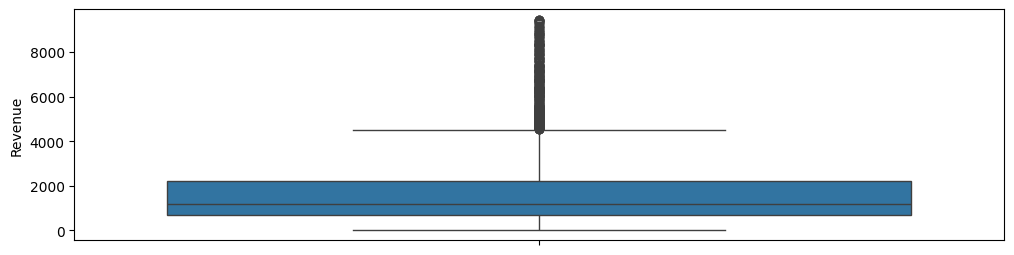

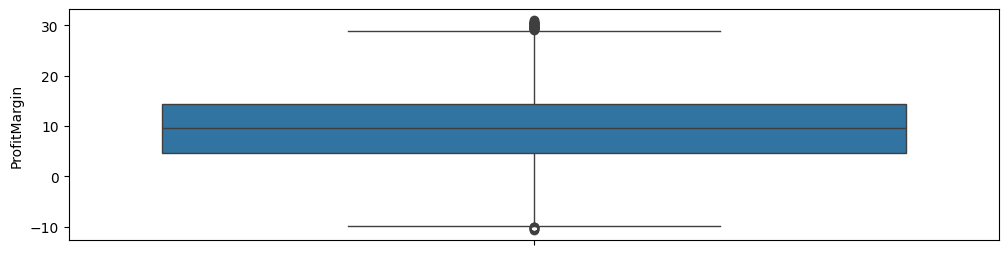

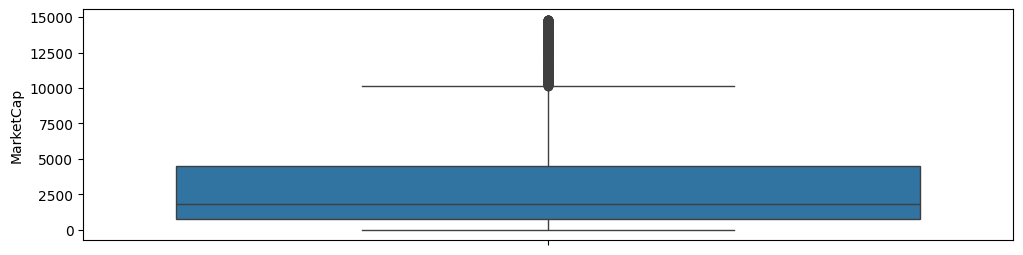

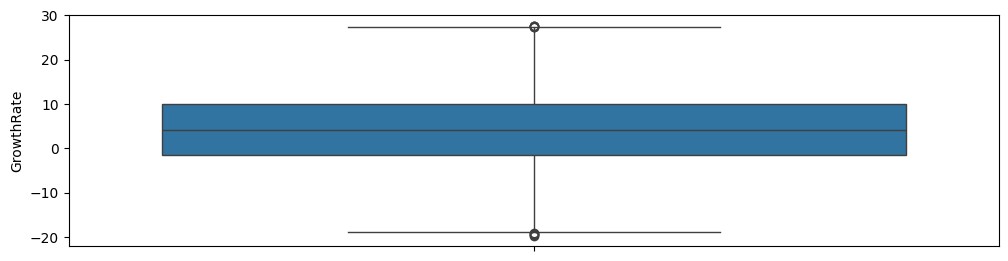

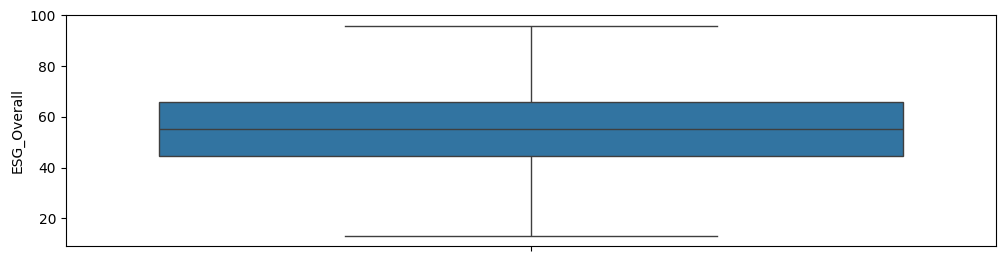

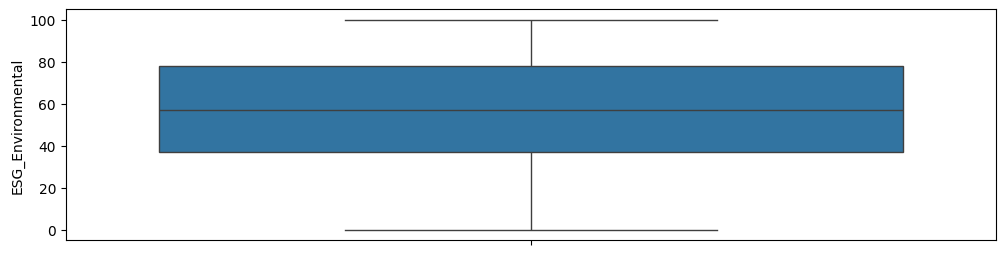

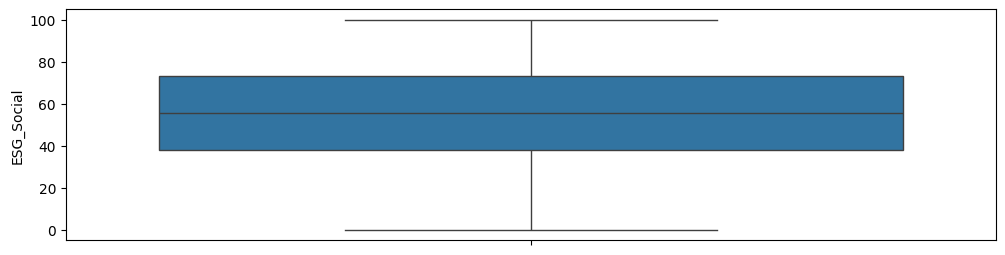

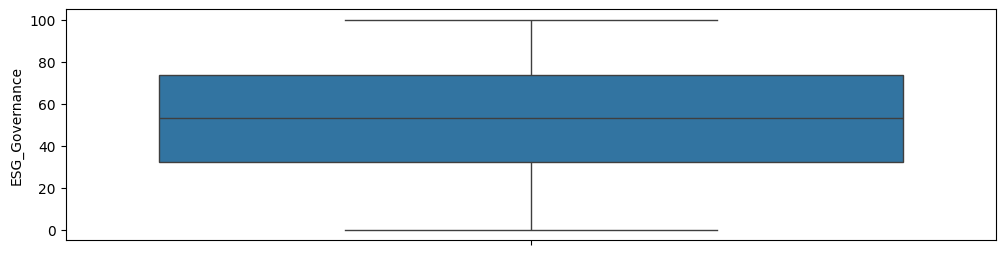

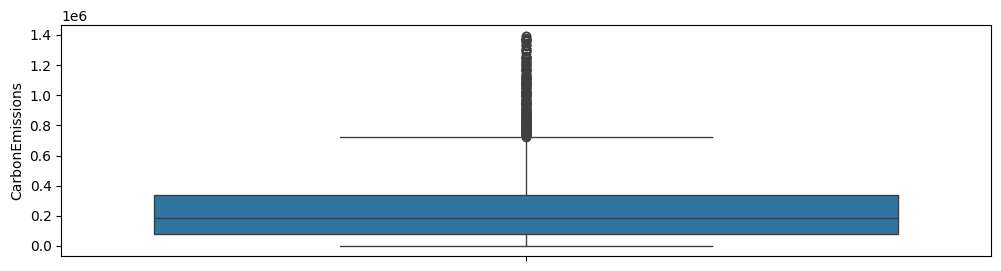

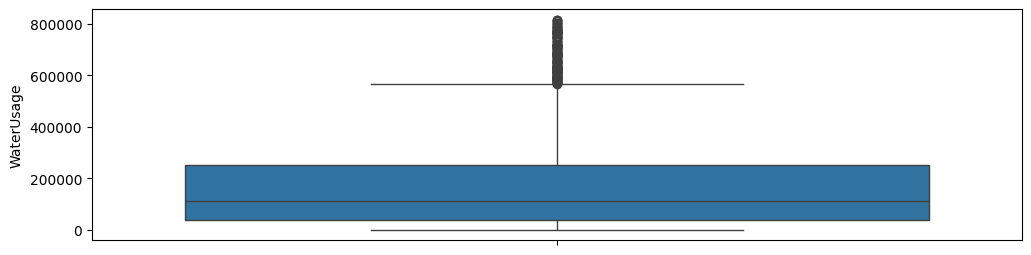

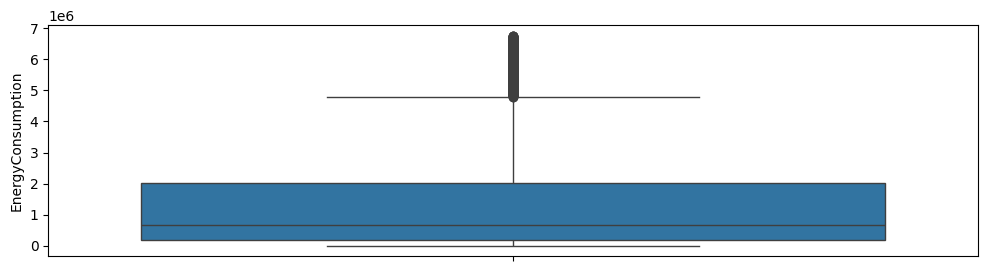

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
  plt.figure(figsize=(12,3))
  sns.boxplot(df[i])

In [14]:
df.isnull().sum()

,0
CompanyName,0
Industry,0
Region,0
Year,0
Revenue,0
ProfitMargin,0
MarketCap,0
GrowthRate,0
ESG_Overall,0
ESG_Environmental,0


No null values exist in our   dataset.

# Data  Visualization

##**1. Univariate Analysis**

### ```Categorical Columns```

In [22]:
for i in df.columns:
  if(df[i].dtype=='object'):
    print("Number of unique categories in column", i, ": ", df[i].nunique())

Number of unique categories in column CompanyName :  715
Number of unique categories in column Industry :  9
Number of unique categories in column Region :  7


We have 715 unique companies, 9 Industry and 7 Regions in our data.

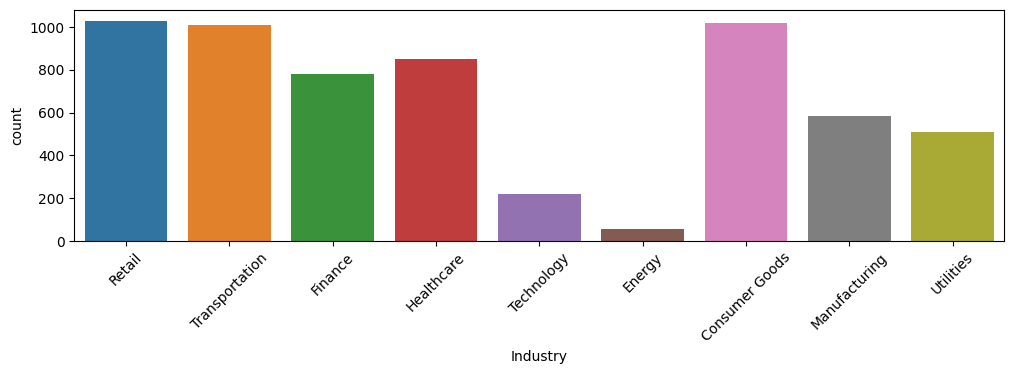

In [70]:
plt.figure(figsize=(12,3))
sns.countplot(x=df['Industry'], hue=df['Industry'])
plt.xticks(rotation=45)
plt.show()

**Retail**, **Transportation** and **Consumer Goods** are so prominent industries while **Energy** Industry is not  taken so much in consideration in our dataset.

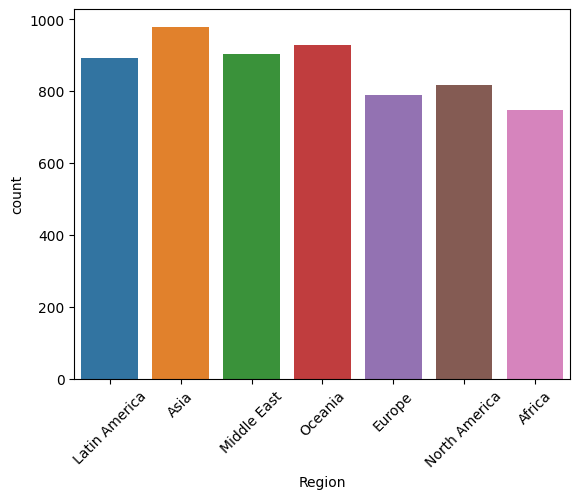

In [71]:
sns.countplot(x=df['Region'], hue=df['Region'])
plt.xticks(rotation=45)
plt.show()

Most of the companies in our  dataset are situated in **Asia** and slightly less in **Latin America, Middle East** and **Oceania**.

### ```Numerical Columns```

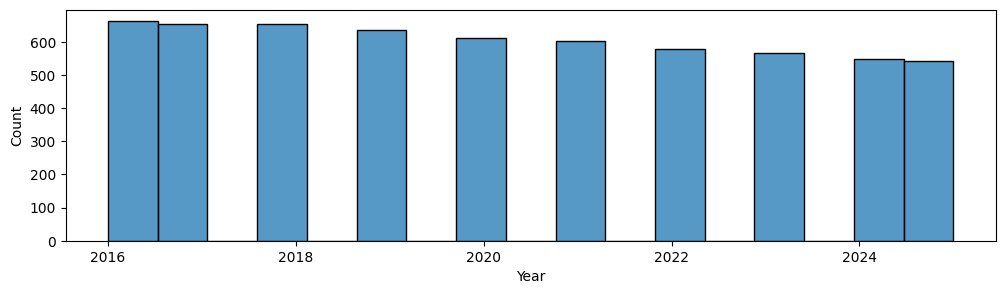

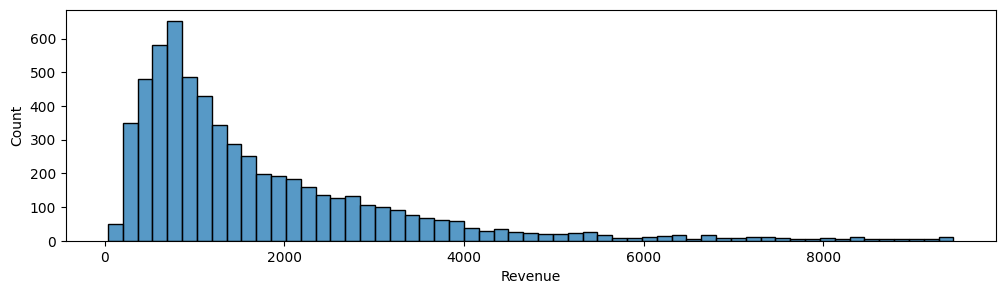

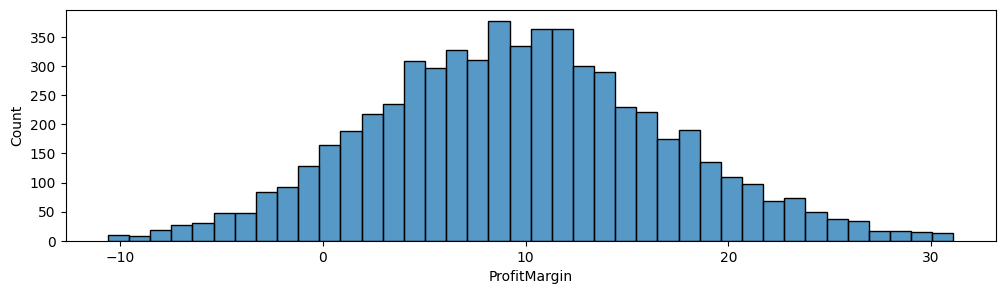

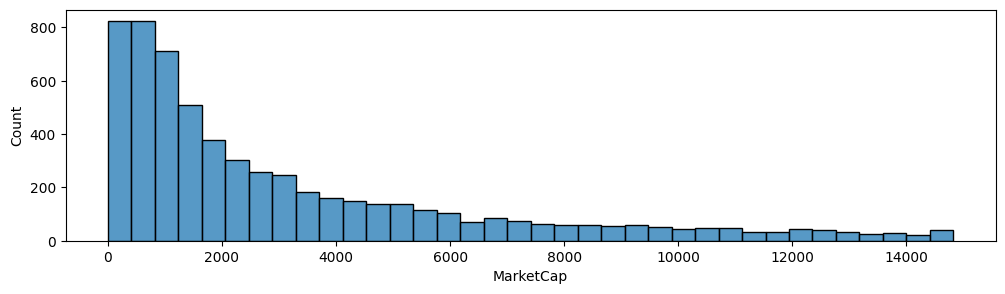

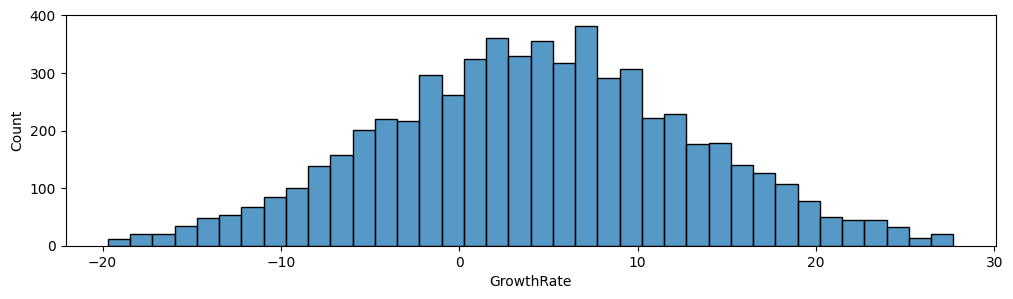

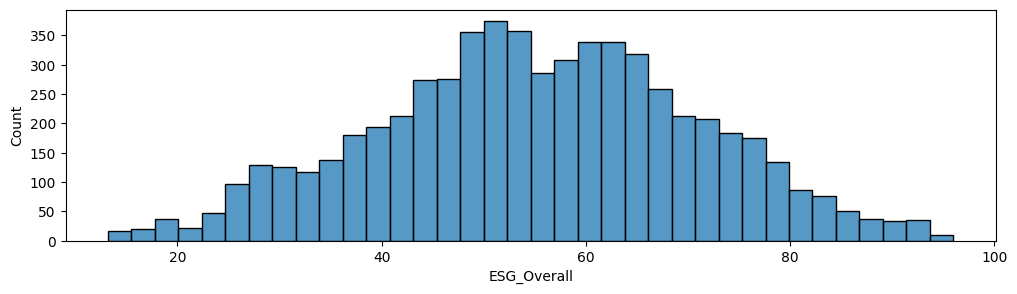

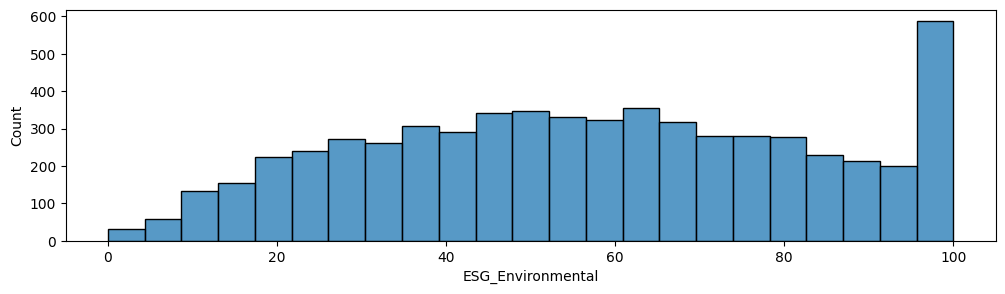

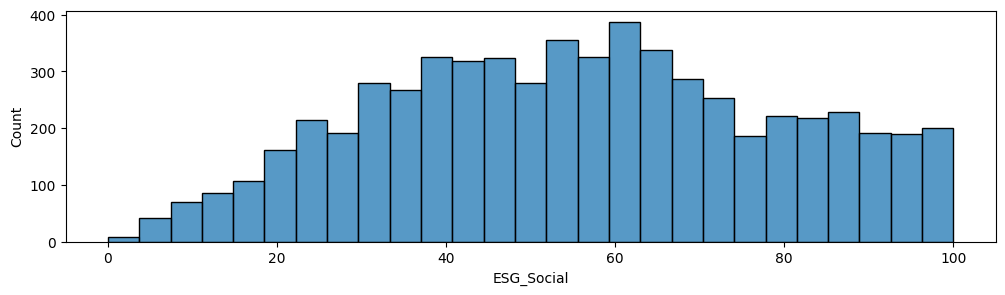

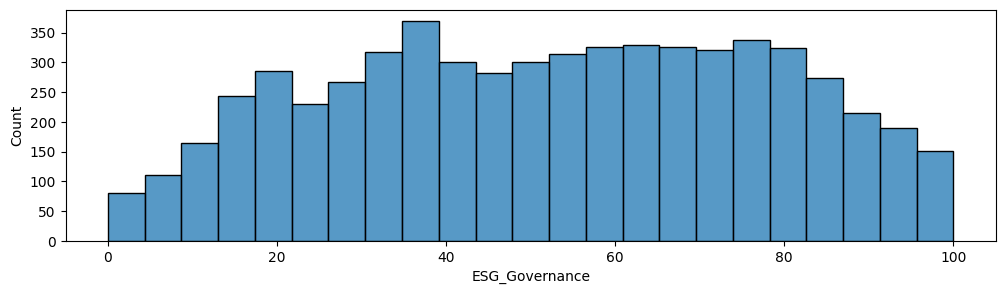

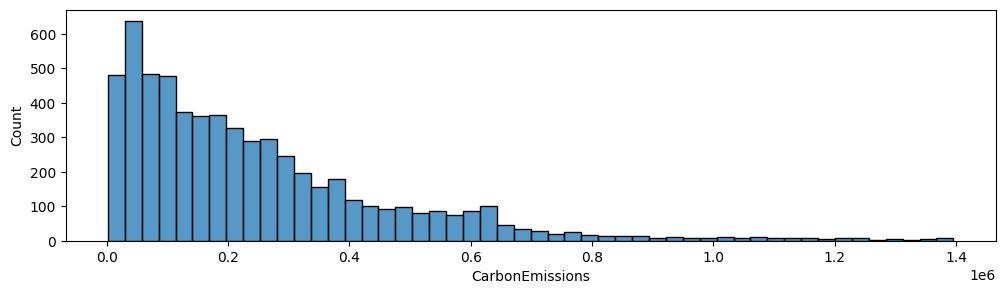

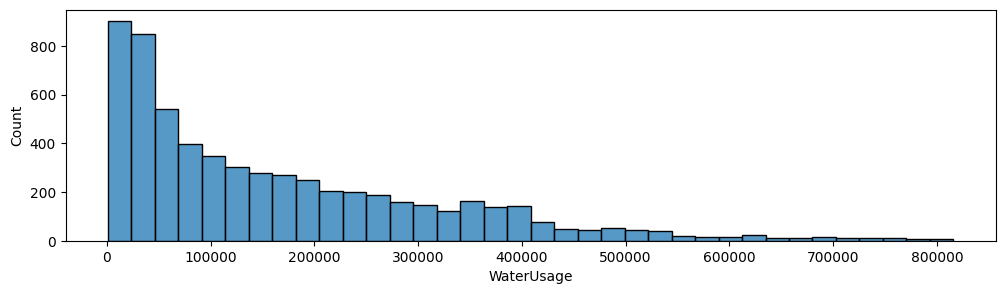

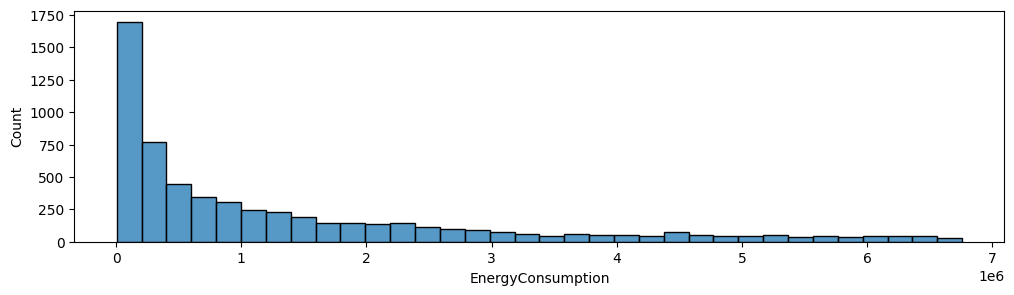

In [35]:
for k in df.columns:
  if(df[k].dtype!='object'):
    plt.figure(figsize=(12,3))
    sns.histplot(df[k])

**Interpretation:**
1. GrowthRate, ProfitMargin and ESGOverall are normally distributed columns.
2. Rest of the columns are mostly positive skewed i.e. aligned towards left side range of  values.

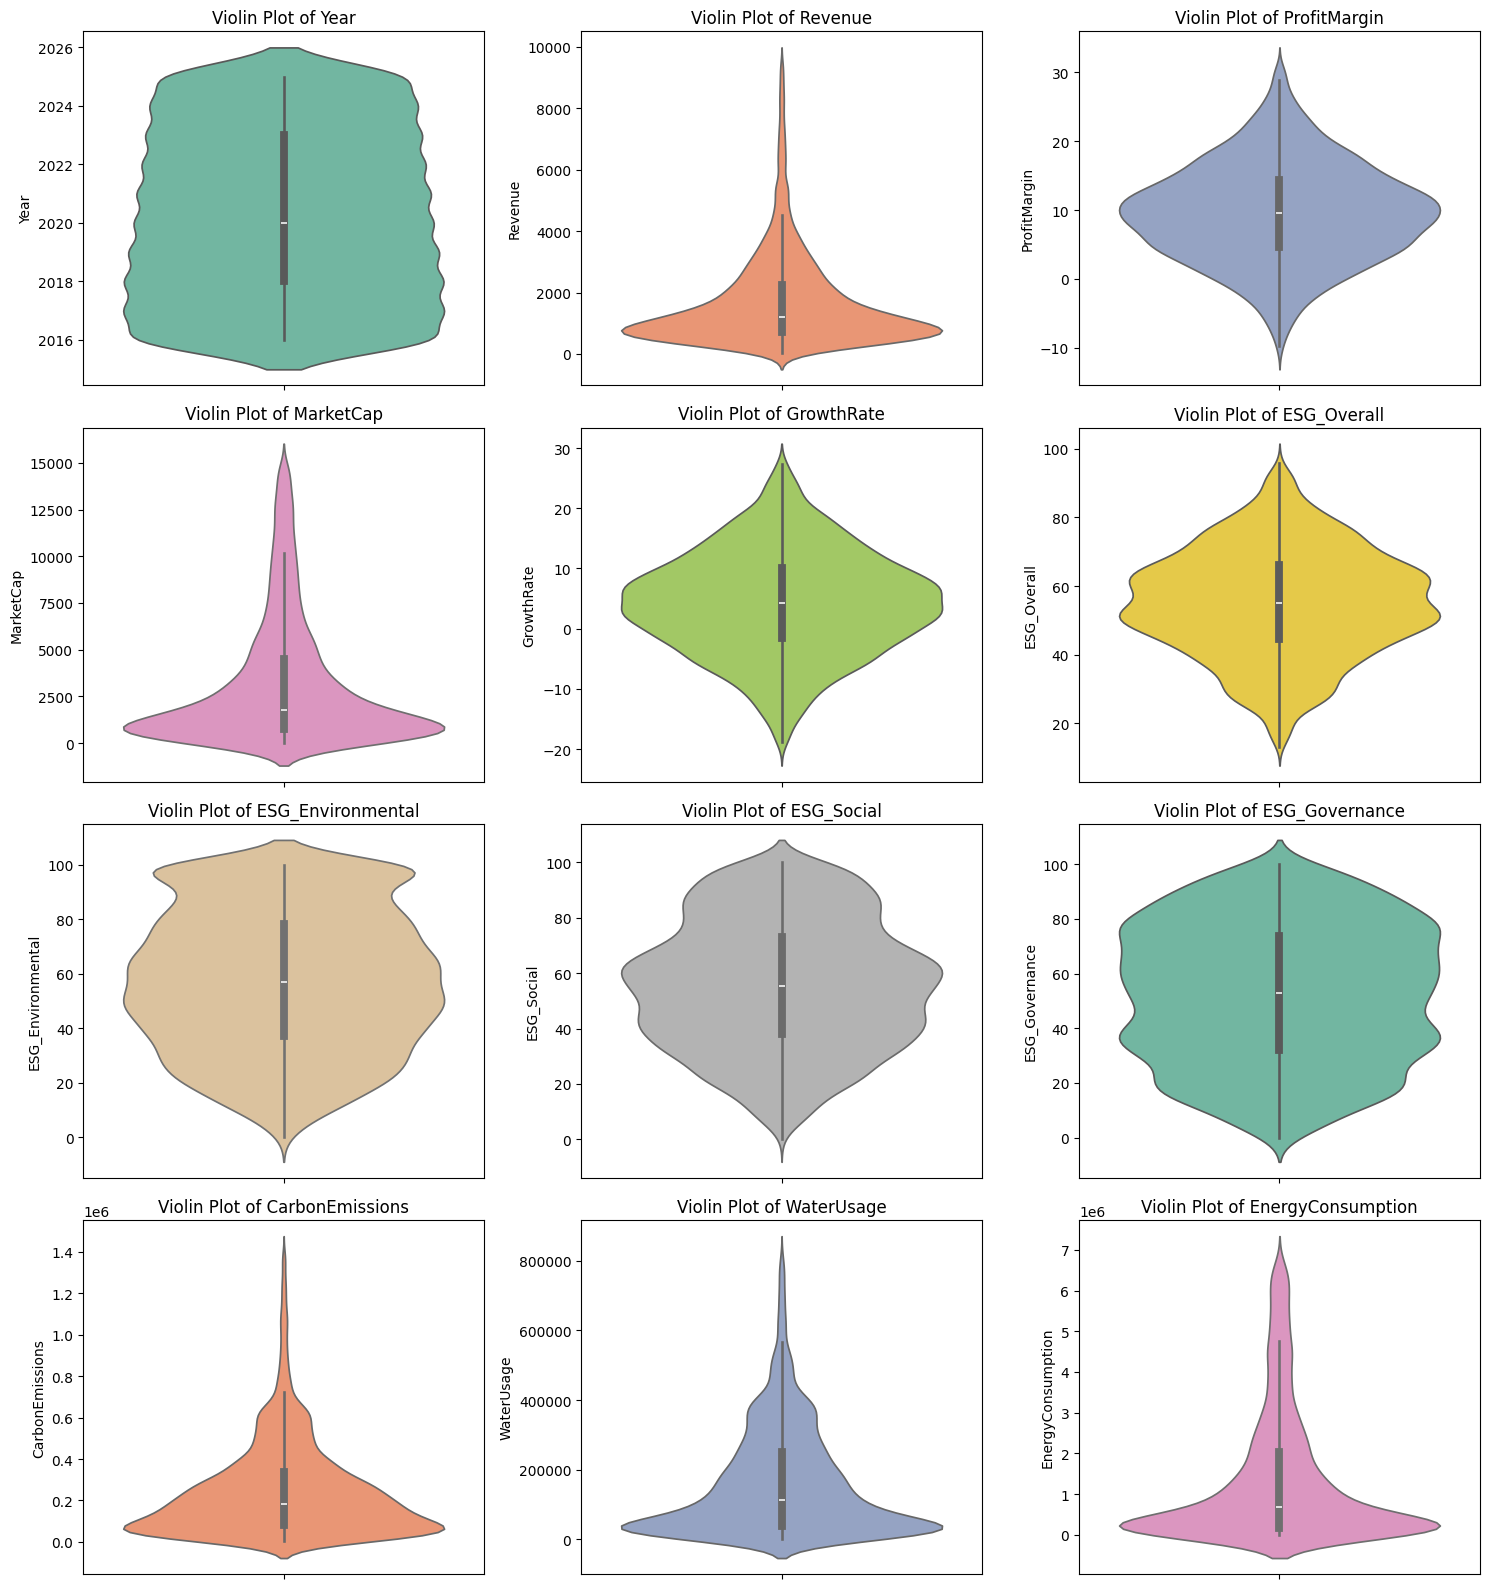

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Get all numeric columns
num_cols = [k for k in df.columns if df[k].dtype != 'object']

n_cols = 3  # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# pick a palette with enough distinct colors
colors = sns.color_palette("Set2", len(num_cols))

for idx, k in enumerate(num_cols):
    sns.violinplot(y=df[k], ax=axes[idx], color=colors[idx])
    axes[idx].set_title(f"Violin Plot of {k}")

# remove extra axes if any
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


This plot gives the distribution of the data values for each column.

## **2. Bivariate Analysis**

Let's analyze how ESG score affected by environmental factors.

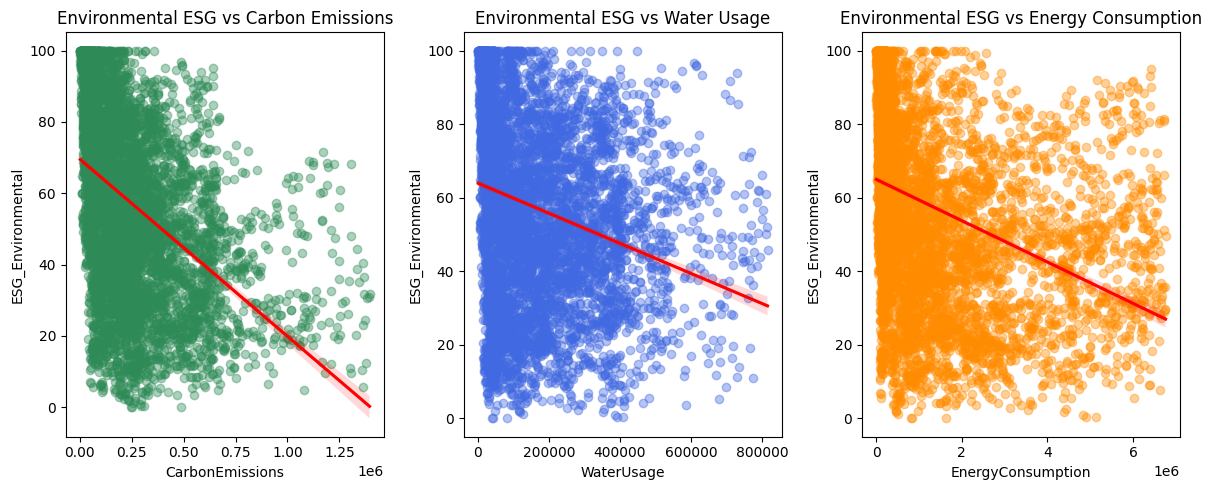

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# ESG_Environmental vs CarbonEmissions
sns.regplot(x='CarbonEmissions', y='ESG_Environmental', data=df,
            ax=axes[0], scatter_kws={'alpha':0.4}, line_kws={"color":"red"}, color="seagreen")
axes[0].set_title("Environmental ESG vs Carbon Emissions")

# ESG_Environmental vs WaterUsage
sns.regplot(x='WaterUsage', y='ESG_Environmental', data=df,
            ax=axes[1], scatter_kws={'alpha':0.4}, line_kws={"color":"red"}, color="royalblue")
axes[1].set_title("Environmental ESG vs Water Usage")

# ESG_Environmental vs EnergyConsumption
sns.regplot(x='EnergyConsumption', y='ESG_Environmental', data=df,
            ax=axes[2], scatter_kws={'alpha':0.4}, line_kws={"color":"red"}, color="darkorange")
axes[2].set_title("Environmental ESG vs Energy Consumption")

plt.tight_layout()
plt.show()


All three environmental factors show a negative correlation with Environmental ESG scores:

- **Strongest impact:** Likely Carbon Emissions (tightest clustering along the trend line).

- **Moderate impact:** Energy Consumption.

- **Weaker impact:** Water Usage (more scatter).

To improve scores, companies should focus on cutting carbon emissions, reducing energy use or shifting to sustainable energy, and conserving water.

In [51]:
import plotly.express as px

# Create an interactive scatter plot with regression trendlines
fig = px.scatter(df,
                 x='Revenue',
                 y='ESG_Overall',
                 color='Industry',
                 trendline='ols',       # Adds regression line
                 hover_data=['Industry', 'Revenue', 'ESG_Overall'],
                 opacity=0.3)           # Fades all points initially

# Functionality to highlight a single industry
# When you select a legend item (industry), it highlights that group
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))
fig.update_layout(title="Revenue vs ESG Overall Score (Interactive by Industry)",
                  legend_title_text='Industry')

fig.show()


Company size influences sustainability and governance practices; higher-revenue companies typically have more resources to invest in sustainable initiatives and vice versa.


/tmp/ipython-input-2580224184.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




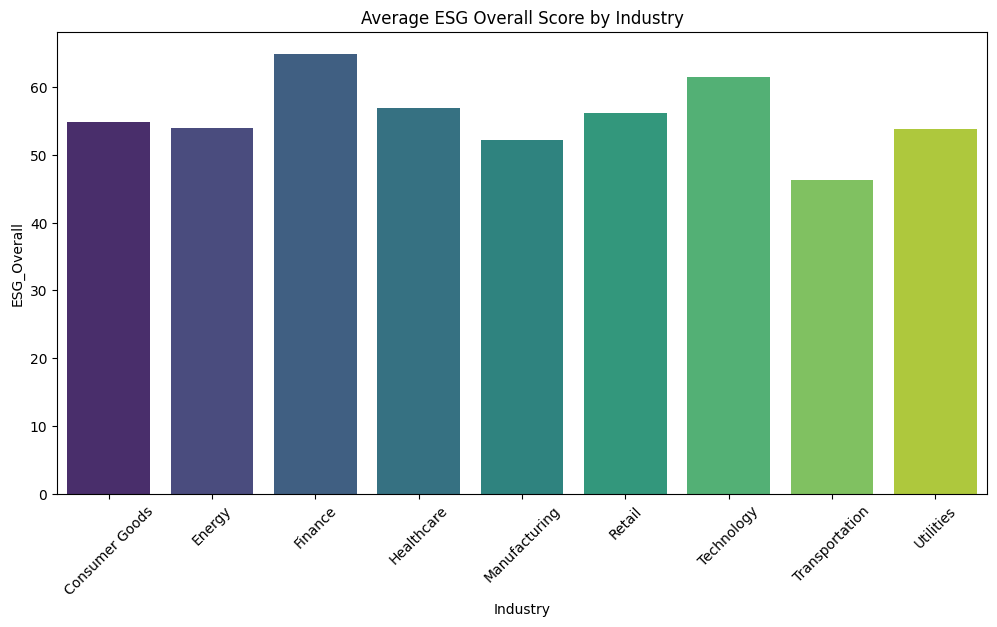

In [68]:
# Average ESG_Overall by Industry
avg_scores = df.groupby('Industry')['ESG_Overall'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Industry', y='ESG_Overall', data=avg_scores,palette='viridis')
plt.title("Average ESG Overall Score by Industry")
plt.xticks(rotation=45)
plt.show()


Finance companies have higher overall ESG scores, excelling in social and governance practices. Being less environmentally intensive, their ESG_Environmental is lower, but they focus on employee well-being and strong governance.

In [72]:
import pandas as pd

columns_to_analyze = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
                      'CarbonEmissions', 'EnergyConsumption', 'WaterUsage']

stats = df[columns_to_analyze].describe()

combined_stats = stats.loc[['min', '25%', 'max']]


stat = combined_stats.style.background_gradient(cmap='YlGnBu').set_caption(
    "ESG and Environmental Metrics: Min, 25th Percentile, Max"
)
stat


,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,EnergyConsumption,WaterUsage
min,13.200000,0.000000,0.000000,0.000000,2042.200000,5105.500000,1021.100000
25%,44.700000,37.000000,38.000000,32.200000,80316.175000,175041.175000,39613.350000
max,96.000000,100.000000,100.000000,100.000000,1395370.300000,6759051.400000,815940.400000


This table provides benchmarks from top-performing companies.
- Lower carbon emissions correlate with better ESG_Environmental scores. Companies should aim below 25th percentile (≈80,000 tons) as a benchmark.

- Energy efficiency improves ESG. Target usage below 25th percentile (≈175,000 units).

- Efficient water usage improves ESG. Aim for water usage below 25th percentile (≈39,600 m³).

## **3. Multivariate Analysis**

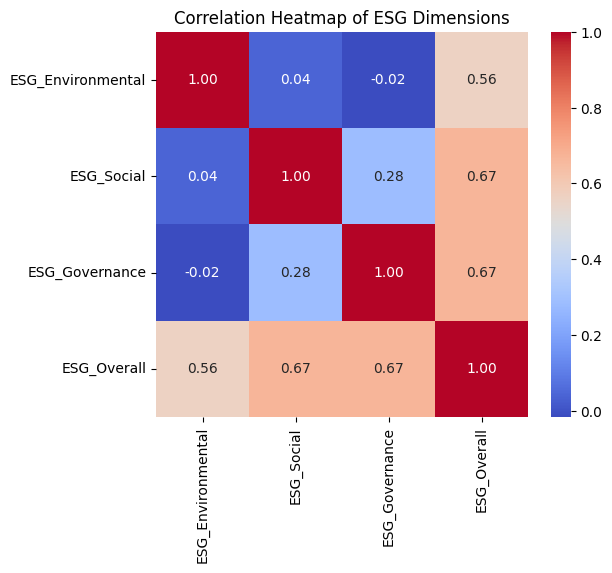

In [49]:
plt.figure(figsize=(6,5))
corr = df[['ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'ESG_Overall']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of ESG Dimensions')
plt.show()

ESG_Governance and ESG_Social has the strongest and equal correlation with Overall ESG score, so, companies should prioritize governance and social - related initiatives first.

In [63]:
import pandas as pd

esg_columns = ['ESG_Environmental', 'ESG_Social', 'ESG_Governance']

# Calculate mean and standard deviation for each dimension
esg_stats = df[esg_columns].agg(['mean', 'std']).T
esg_stats['potential_gain'] = esg_stats['std'] / esg_stats['mean']  # Higher value = more potential

# Sort by potential gain
esg_stats = esg_stats.sort_values(by='potential_gain', ascending=False)

print("ESG dimensions with potential for high gains from small improvements:")
print(esg_stats)


ESG dimensions with potential for high gains from small improvements:
                        mean        std  potential_gain
ESG_Governance     52.468989  25.288201        0.481965
ESG_Environmental  57.244435  25.923424        0.452855
ESG_Social         55.684429  23.204093        0.416707


ESG_Governance has the highest potential_gain (0.48).

This means that small improvements in governance practices could yield relatively large increases in your overall ESG score.

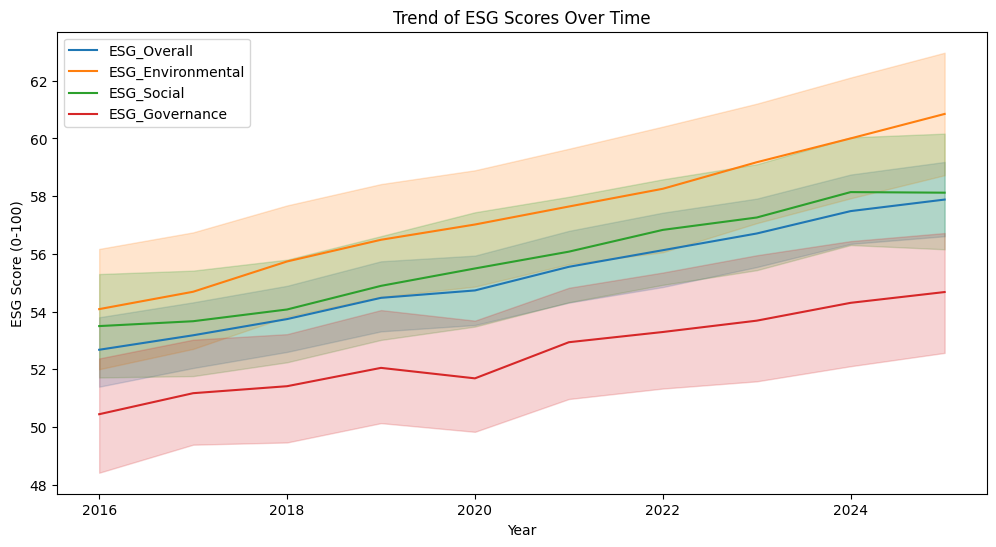

In [64]:
# How have ESG scores and environmental factors changed over time (Year)?

import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
esg_cols = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']

plt.figure(figsize=(12,6))
for col in esg_cols:
    sns.lineplot(data=df, x='Year', y=col, label=col)

plt.title("Trend of ESG Scores Over Time")
plt.xlabel("Year")
plt.ylabel("ESG Score (0-100)")
plt.legend()
plt.show()


## **Summary of Findings:**
- Overall ESG scores have shown an increasing trend over the years, indicating a growing focus on sustainability and social responsibility in the business world.

- The average ESG scores vary significantly across industries. ```Finance``` and ```Technology``` sectors generally exhibit higher ESG scores, particularly in the environmental component, while ```Energy``` and ```Transportation``` tend to have lower scores.

- The Total ESG Score shows positive correlations with financial metrics such as ```Revenue, MarketCap, ProfitMargin```, and ```GrowthRate```, although these correlations are not very strong.

- There are weak negative correlations between Total ESG Score and environmental metrics like ```CarbonEmissions, WaterUsage```, and ```EnergyConsumption```.


## **General Questions:**

1. **What ranges of environmental metrics do top-performing companies fall in?**

 - **CarbonEmissions:** 80316.175(tons)
 - **EnergyConsumption:** 175041.175(megawatt-hours (MWh))
 - **WaterUsage:** 39613.350(cubic meters)    



---



2. **Which specific metrics (e.g., carbon emissions, energy consumption, water usage) are driving the ESG scores down?**

- Carbon emissions usually have the strongest negative correlation with ESG_Environmental. In short, carbon emissions are heavily impacting ESG scores.

- Energy and water also negatively impact ESG but may vary by industry.



---


3. **Are there any ESG areas where small improvements yield large score gains?**

- Focus first on Governance: policies, board diversity, risk management, transparency.

- Next, target Environmental actions that have measurable effects.



---


4. **Which ESG sub-dimensions (Environmental, Social, Governance) contribute most to overall ESG score?**

- ESG_Social and ESG_Governance generally correlate most positively with ESG_Overall.

- Thus, focusing  more towards ESG_Social and ESG_Governance helps improvized overall ESG scores.


===========================================================================================================

In general,

 **Which ESG initiatives improve score by at least 5 points without exceeding $50k cost?**

**Answer:** “Switching to LED lighting in offices reduces energy by 15%, improves ESG_Environmental by 4 points, cost $20k, no impact on operations.”

This allows you to make small, subtle interventions with measurable ESG benefits and minimal disruption.

## **Actionable Insights for Improving ESG Scores:**

- **Benchmark against Industry Leaders:** Companies in industries with lower average ESG scores (e.g., Energy, Transportation) should study the practices of those with higher scores (e.g., Finance, Technology) to identify areas for improvement, especially in environmental initiatives.

- **Focus on Environmental Performance:** Given the negative correlation with environmental metrics, companies should prioritize reducing carbon emissions, optimizing water usage, and decreasing energy consumption. Investing in cleaner technologies and sustainable operations can significantly impact ESG scores.

- **Strengthen Governance and Social Practices:** While environmental aspects showed some negative correlations, the positive correlations with Social and Governance scores suggest that improving practices in these areas can also contribute to a higher overall ESG score. This includes aspects like labor practices, community involvement, ethical conduct, and board diversity.

- **Recognize the Potential Financial Benefits:** Although the correlations are not strong, the positive relationship between ESG scores and financial metrics suggests that improving ESG performance could potentially lead to better financial outcomes in the long term. This can be a motivating factor for companies to invest in ESG initiatives.

